In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import chardet


In [16]:
#data=pd.read_csv("D:/Seema-class-excelr/CSV/ToyotaCorolla.csv")
with open('D:/Seema-class-excelr/CSV/ToyotaCorolla.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
data=pd.read_csv('D:/Seema-class-excelr/CSV/ToyotaCorolla.csv', encoding=result['encoding'])
data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color   ...    Central_Lock  \
0         10      2002  46986    Diesel  90          1   ...               1   
1         10      2002  72937    Diesel  90          1   ...               1   
2          9      2002  41711    Diesel  90          1   ...               0   
3          7      2002  48000    Diesel  90          0   ...               0   
4          3      2002  38500    Diesel  90          0   ...               1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
Id                  1436 non-null int64
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Color               1436 non-null object
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1  

In [24]:
! pip install scikit-learn
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Model'] = data['Model'].astype('category')
#le = LabelEncoder()
data['Model2'] = le.fit_transform(data['Model'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Fuel_Type'] = data['Fuel_Type'].astype('category')
#le = LabelEncoder()
data['Fuel2'] = le.fit_transform(data['Fuel_Type'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Color'] = data['Color'].astype('category')
#le = LabelEncoder()
data['Color2'] = le.fit_transform(data['Color'])


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
conda 4.10.3 requires ruamel_yaml_conda>=0.11.14, which is not installed.
You are using pip version 10.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
data.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color   ...   Radio  \
0         10      2002  46986    Diesel  90          1   ...       0   
1         10      2002  72937    Diesel  90          1   ...       0   
2          9      2002  41711    Diesel  90          1   ...       0   
3          7      2002  48000    Diesel  90          0   ...       0   
4          3      2002  38500    Diesel  90          0   ...       0   

   Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  \
0          0            0                 1             0               0   
1          0            0                 1             0               0   
2          0            0                 1             0               0   
3          0            0                 1             0               0   
4          1            0                 1             0               0   

   Tow_Bar  Model2  Fuel2  Color2  
0        0     257      1       2  
1        0     257      1       6  
2        0     365      1       2  
3        0     257      1       1  
4        0     256      1       1  

[5 rows x 41 columns]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 41 columns):
Id                  1436 non-null int64
Model               1436 non-null category
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null category
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Color               1436 non-null category
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airb

In [27]:
data.corr()

Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax    -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   
Model2           -0.372751  0.304868  -0.322985   0.007415  0.323585   
Fuel2             0.154353 -0.022157   0.080261  -0.043774 -0.072803   
Color2            0.003053 -0.051590   0.029712  -0.035049 -0.023532   

                        KM        HP  Met_Color  Automatic        cc  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740   
cc                0.102683  0.035856   0.031812   0.066740  1.000000   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629   
Quarterly_Tax     0.278165 -0.298432   0.011326  -0.055371  0.306996   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.0

In [31]:
del data['Model']
del data['Color']
del data['Fuel_Type']

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
Id                  1436 non-null int64
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco               1436 non-null int64
Automatic_air

In [33]:
data.isna().sum()

Id                  0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
Model2              0
Fuel2               0
Color2              0
dtype: int64

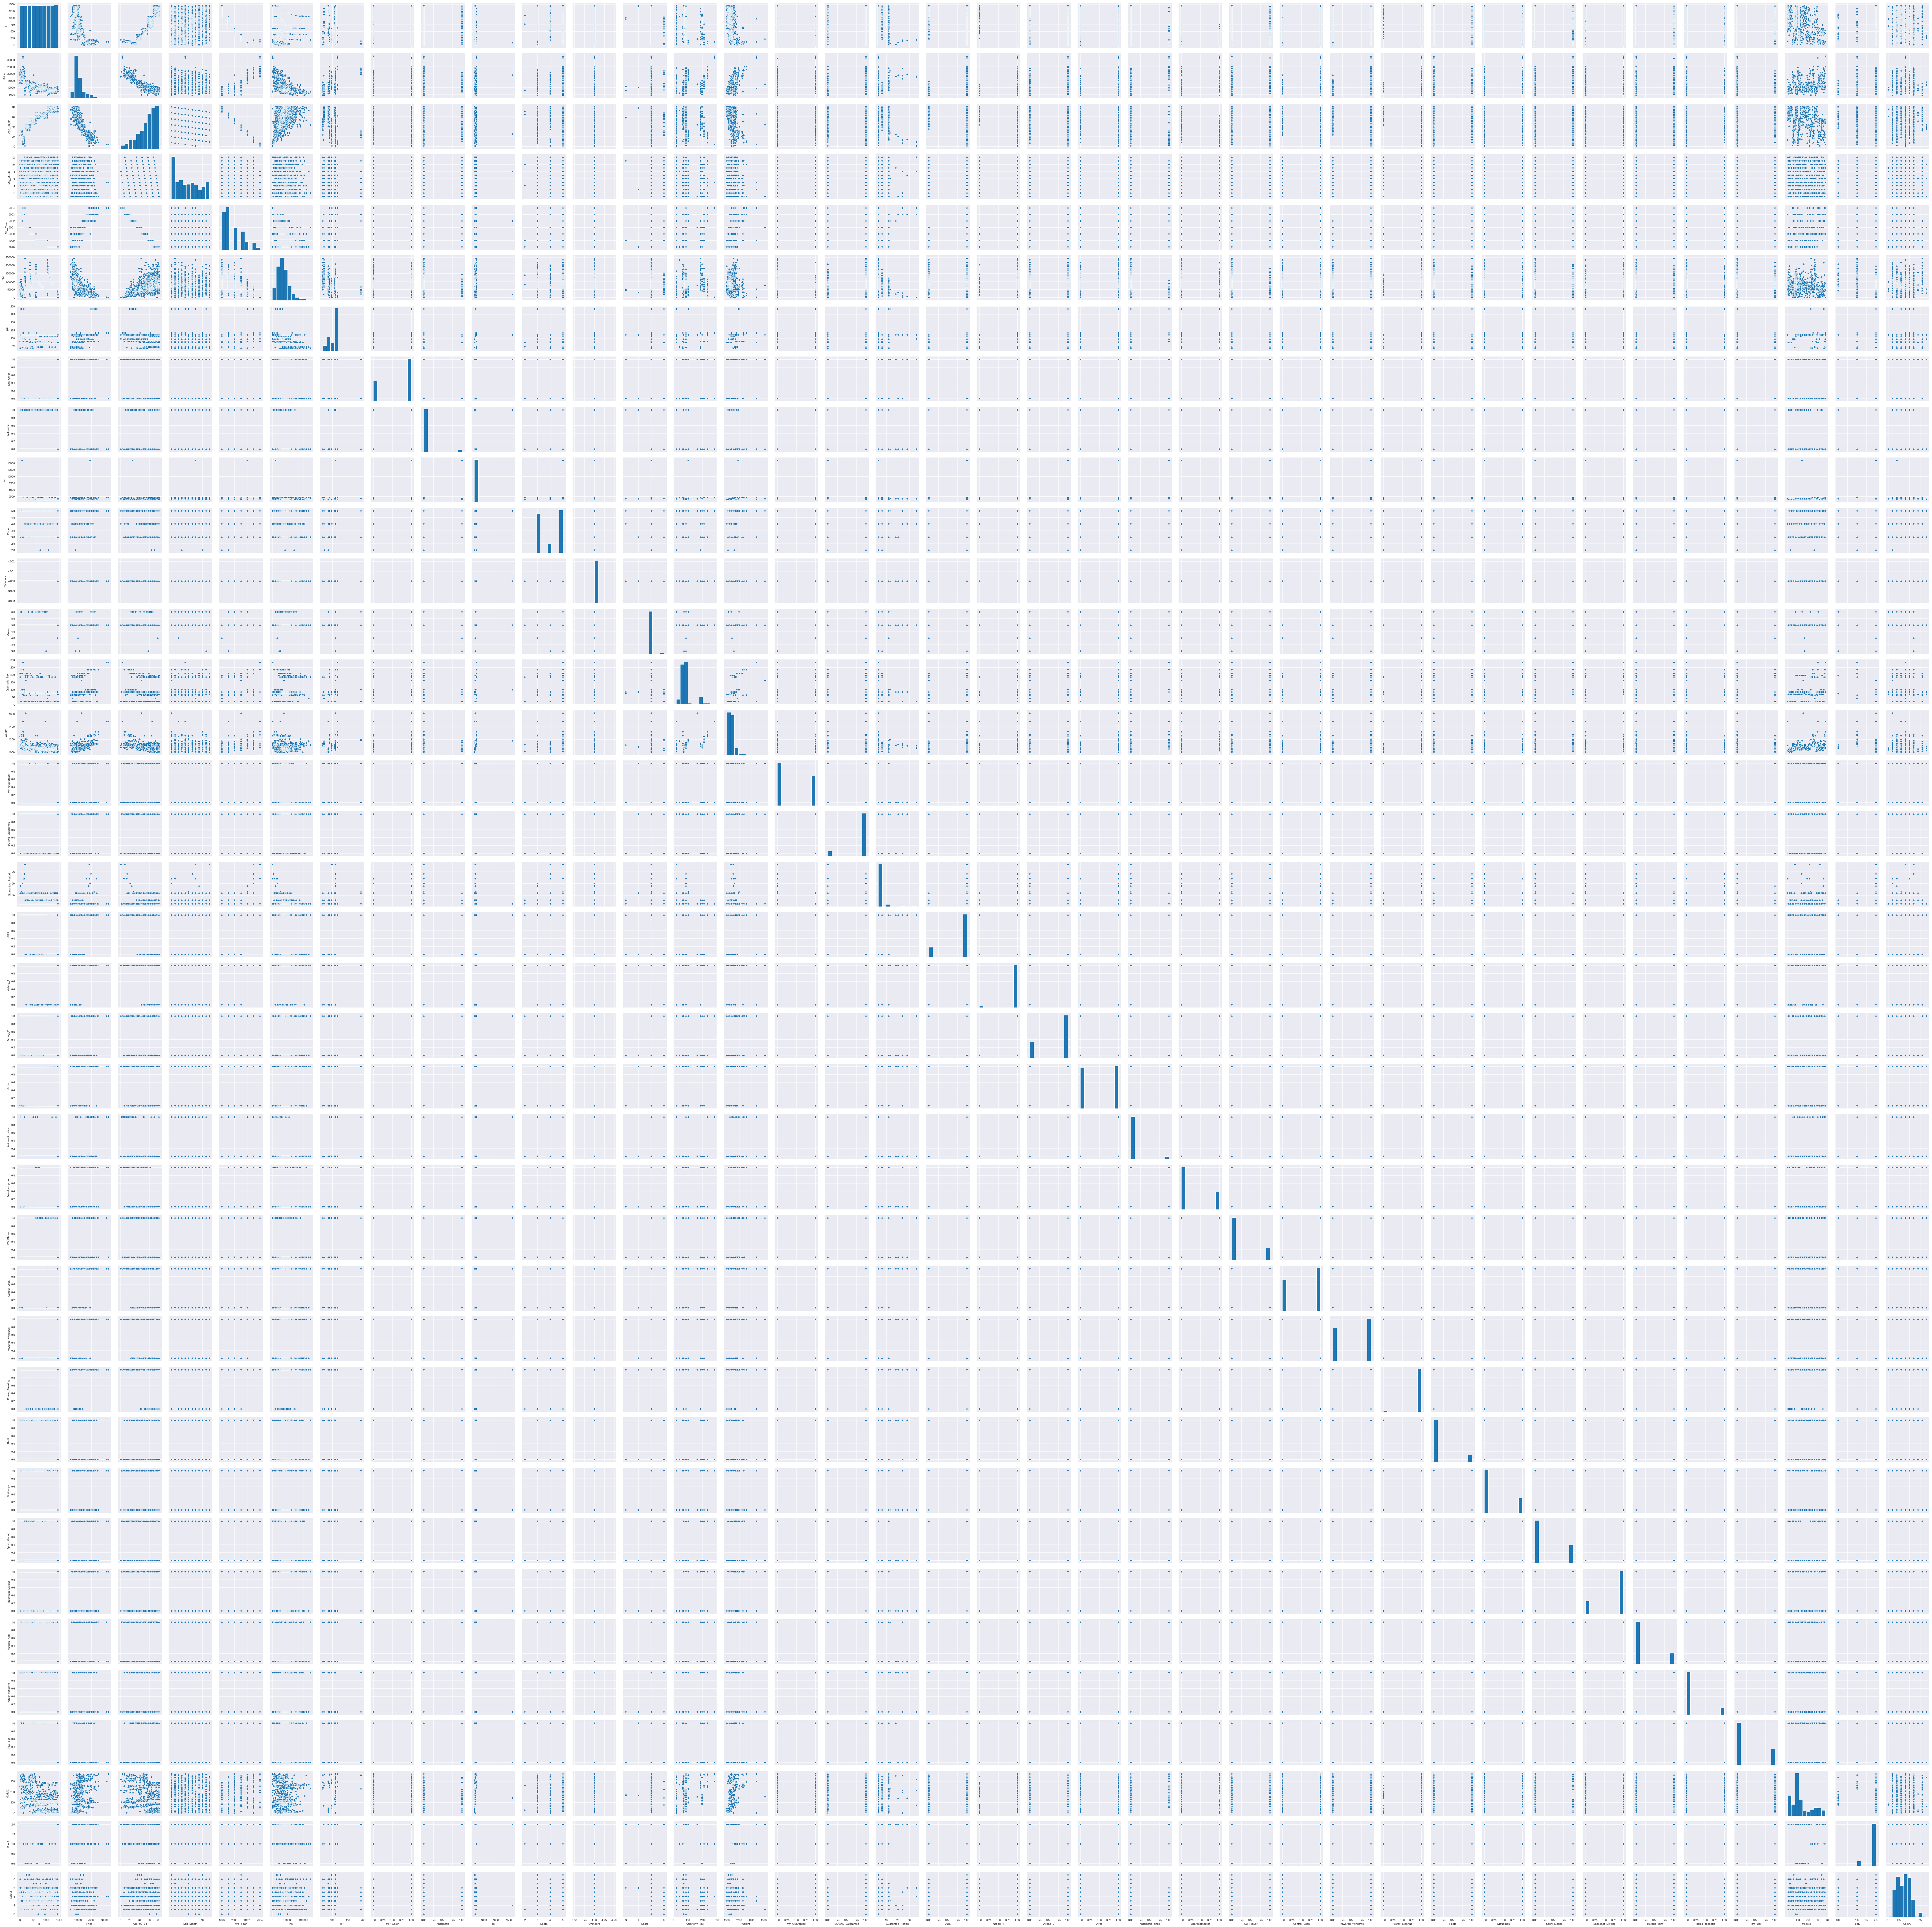

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [35]:
data.columns

Index(['Id', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'HP',
       'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar', 'Model2', 'Fuel2', 'Color2'],
      dtype='object')

In [37]:
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()



In [40]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:54:17   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [43]:
ml_doors=smf.ols('Price~Doors',data = data).fit()  
#t and p-Values
print(ml_doors.tvalues, '\n', ml_doors.pvalues)  

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [44]:
rsq_doors = smf.ols('Doors~Price',data=data).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

In [45]:
d1 = {'Variables':['Doors'],'VIF':[vif_doors]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0     Doors  1.035567

H:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


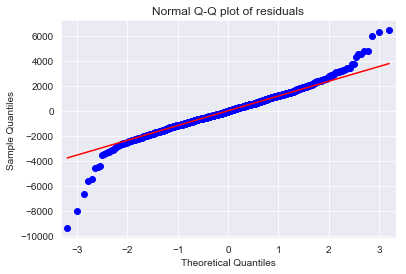

In [46]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [47]:
list(np.where(model.resid>5000))

[array([109, 147, 523], dtype=int64)]

In [48]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

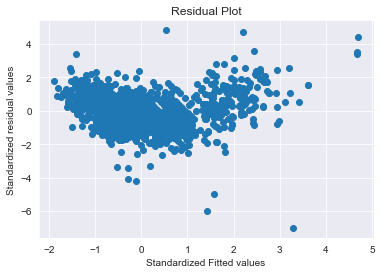

In [49]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

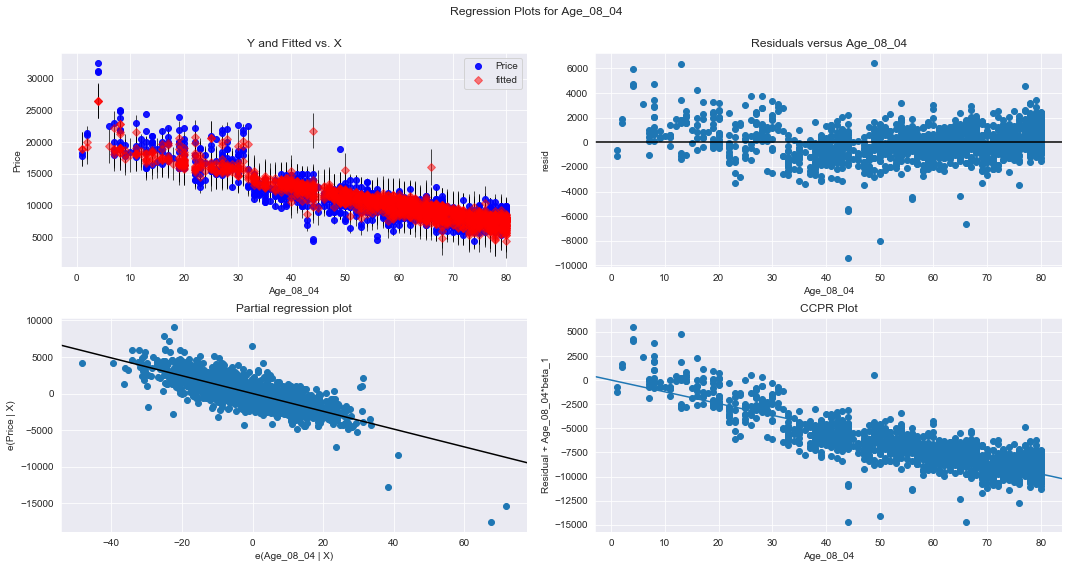

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

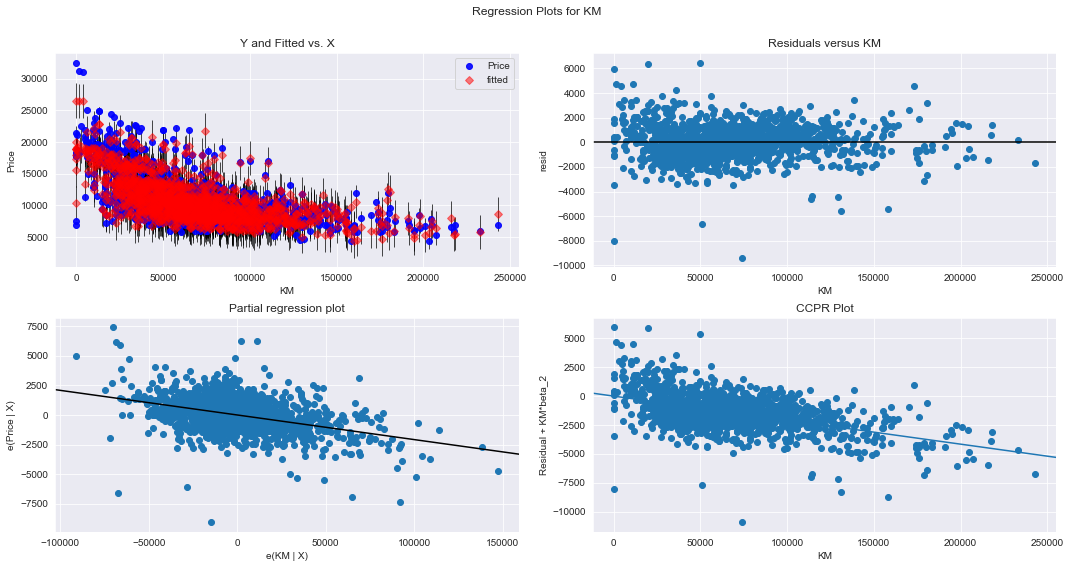

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

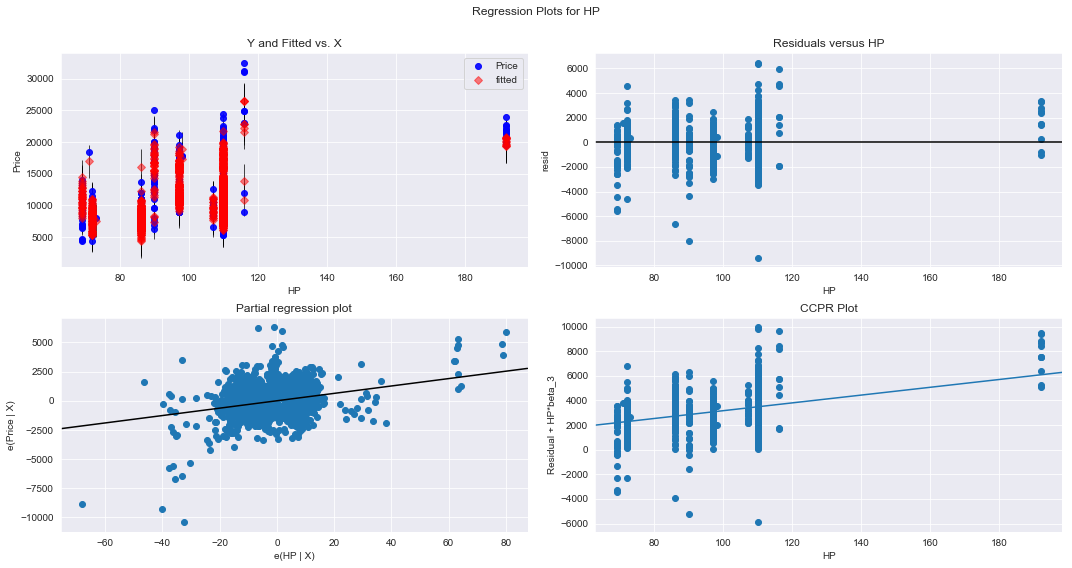

In [52]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

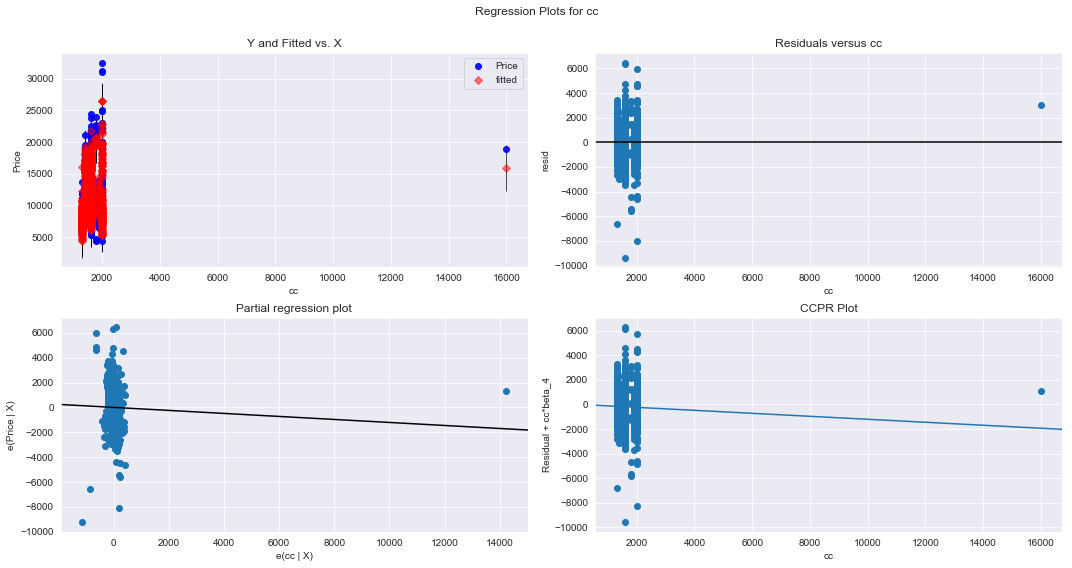

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

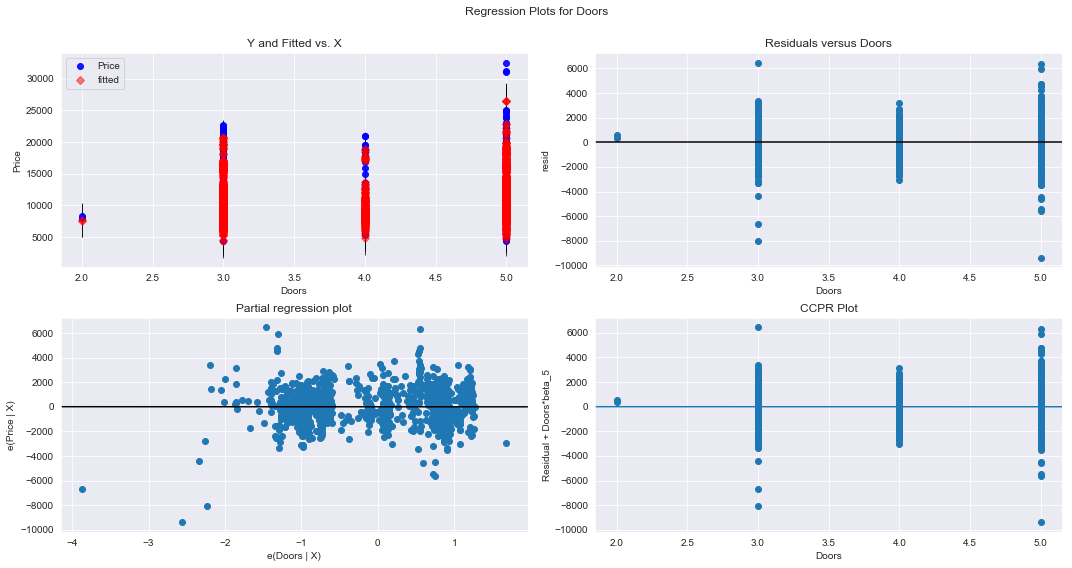

In [54]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

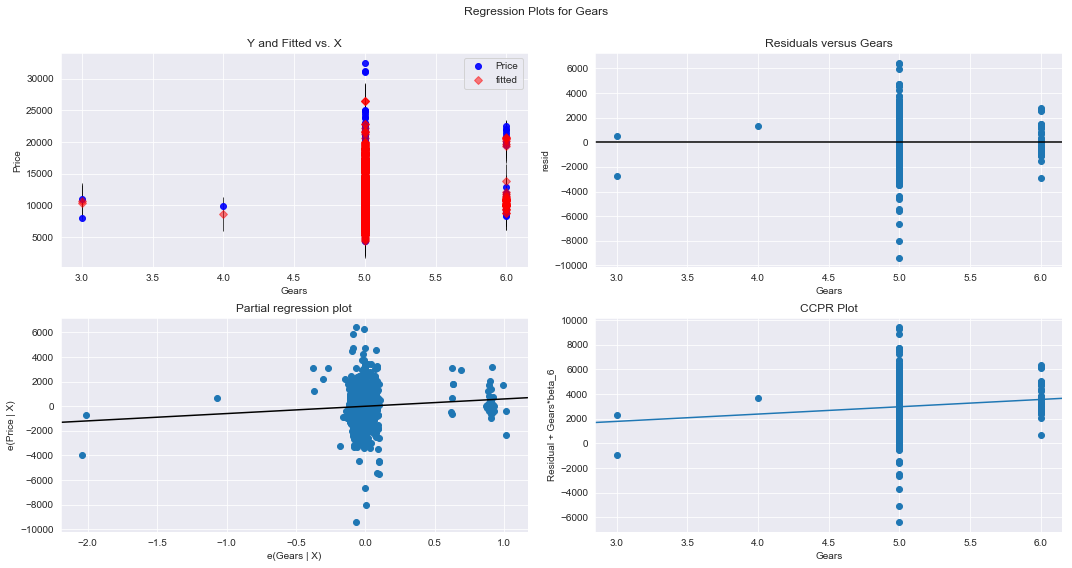

In [55]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

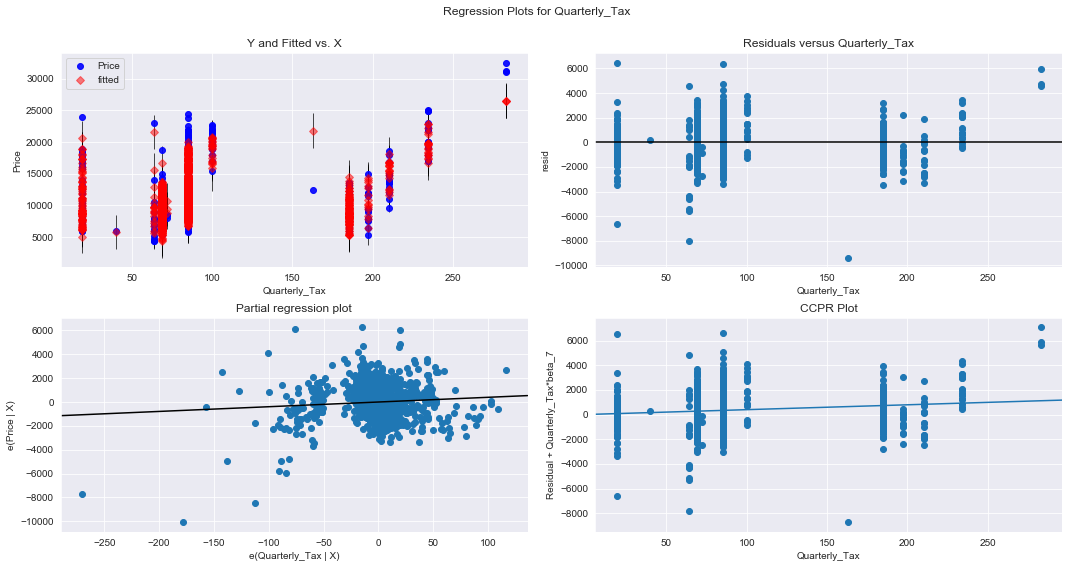

In [56]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

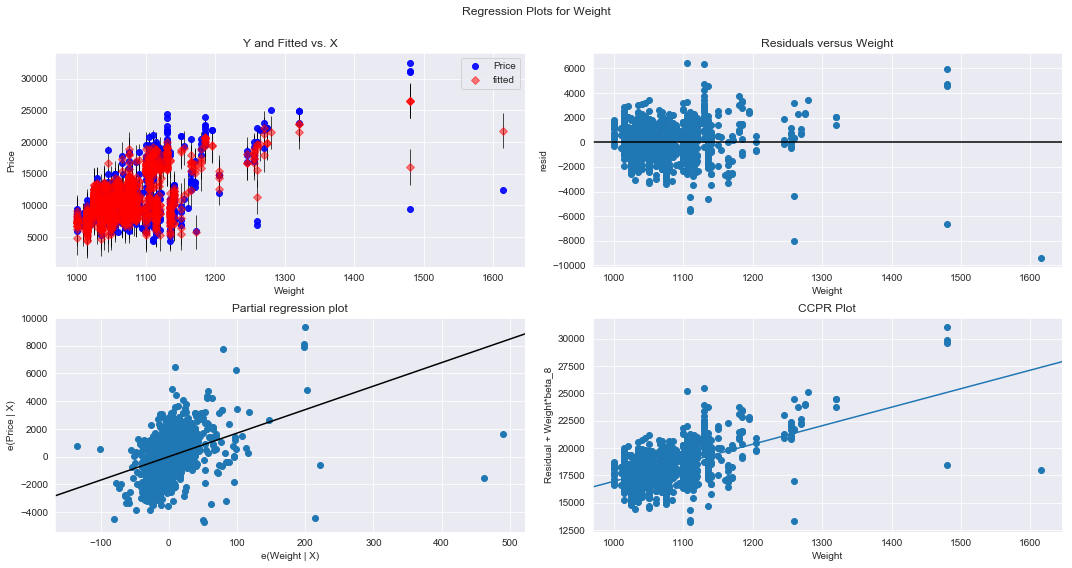

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [58]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

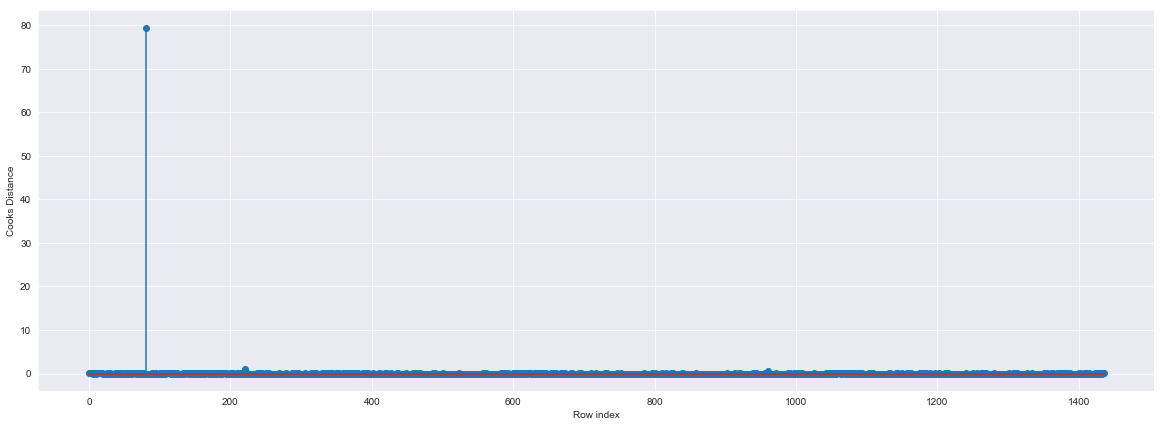

In [59]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [61]:
(np.argmax(c),np.max(c))

(80, 79.52010624135295)

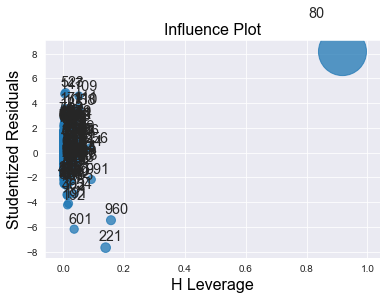

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [63]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [64]:
data[data.index.isin([80])]

Id  Price  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  Met_Color  \
80  81  18950         25          8      2002  20019  110          1   

    Automatic     cc   ...    Radio  Mistlamps  Sport_Model  Backseat_Divider  \
80          1  16000   ...        0          0            0                 0   

    Metallic_Rim  Radio_cassette  Tow_Bar  Model2  Fuel2  Color2  
80             0               0        0     142      2       2  

[1 rows x 38 columns]

In [65]:
data1=data.drop(data.index[[80]],axis=0).reset_index()

In [67]:
data1

index    Id  Price  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  \
0         0     1  13500         23         10      2002  46986   90   
1         1     2  13750         23         10      2002  72937   90   
2         2     3  13950         24          9      2002  41711   90   
3         3     4  14950         26          7      2002  48000   90   
4         4     5  13750         30          3      2002  38500   90   
5         5     6  12950         32          1      2002  61000   90   
6         6     7  16900         27          6      2002  94612   90   
7         7     8  18600         30          3      2002  75889   90   
8         8     9  21500         27          6      2002  19700  192   
9         9    10  12950         23         10      2002  71138   69   
10       10    11  20950         25          8      2002  31461  192   
11       11    12  19950         22         11      2002  43610  192   
12       12    13  19600         25          8      2002  32189  192   
13       13    14  21500         31          2      2002  23000  192   
14       14    15  22500         32          1      2002  34131  192   
15       15    16  22000         28          5      2002  18739  192   
16       16    17  22750         30          3      2002  34000  192   
17       17    18  17950         24          9      2002  21716  110   
18       18    19  16750         24          9      2002  25563  110   
19       19    20  16950         30          3      2002  64359  110   
20       20    21  15950         30          3      2002  67660  110   
21       21    22  16950         29          4      2002  43905  110   
22       22    23  15950         28          5      2002  56349  110   
23       23    24  16950         28          5      2002  32220  110   
24       24    25  16250         29          4      2002  25813  110   
25       25    26  15950         25          8      2002  28450  110   
26       26    27  17495         27          6      2002  34545  110   
27       27    28  15750         29          4      2002  41415  110   
28       28    29  16950         28          5      2002  44142  110   
29       29    30  17950         30          3      2002  11090  110   
...     ...   ...    ...        ...        ...       ...    ...  ...   
1405   1406  1413   8950         70         11      1998  44850  110   
1406   1407  1414   8250         69         12      1998  44826  110   
1407   1408  1415   9250         80          1      1998  44444  110   
1408   1409  1416   7900         75          6      1998  43720  110   
1409   1410  1417   8500         78          3      1998  43622   86   
1410   1411  1418   7950         76          5      1998  43532  110   
1411   1412  1419   9950         69         12      1998  42800  110   
1412   1413  1420   8750         74          7      1998  42317  107   
1413   1414  1421   7500         80          1      1998  42186  110   
1414   1415  1422   6950         72          9      1998  42000  110   
1415   1416  1423   8950         79          2      1998  40093  110   
1416   1417  1424   8750         79          2      1998  39800  107   
1417   1418  1425   7750         73          8      1998  39168   86   
1418   1419  1426   8450         75          6      1998  38945  110   
1419   1420  1427   8150         76          5      1998  36537  110   
1420   1421  1428   8500         78          3      1998  36000   86   
1421   1422  1429   7600         78          3      1998  36000  110   
1422   1423  1430   7950         80          1      1998  35821   86   
1423   1424  1431   7750         73          8      1998  34717   86   
1424   1425  1432   7950         80          1      1998  34000   86   
1425   1426  1433   9950         78          3      1998  30964  110   
1426   1427  1434   8950         71         10      1998  29000   86   
1427   1428  1435   8450         72          9      1998  26000   86   
1428   1429  1436   8950         78          3

In [73]:
model_final= smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=data1).fit()

In [74]:
(model_final.rsquared,model_final.aic)

(0.8693790488655818, 24687.28102432684)

In [75]:
model_influence_price= model_final.get_influence()
(c_price, _) = model_influence_price.cooks_distance

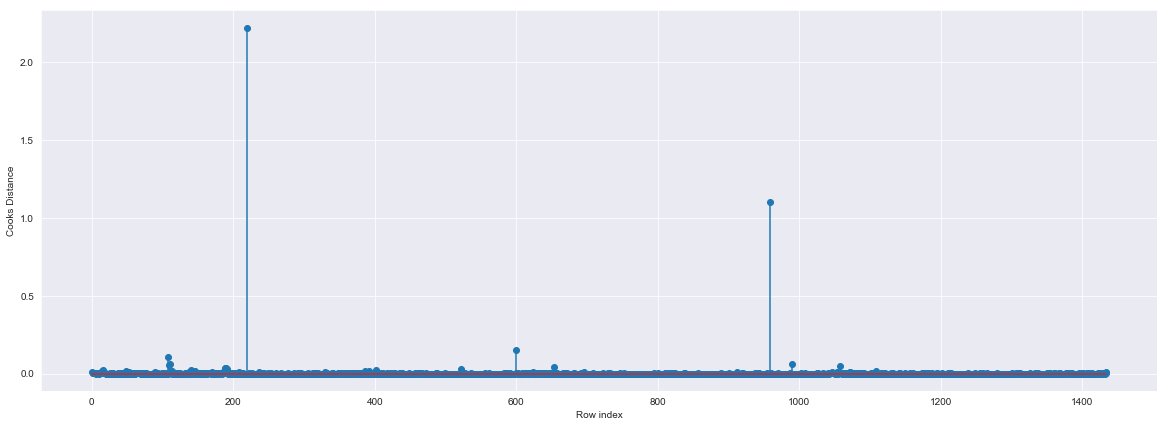

In [76]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_price,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [79]:
(np.argmax(c_price),np.max(c_price))

(220, 2.224461171300801)

In [80]:
data1['c_price'] = c_price

In [95]:
data1[data1.c_price<0.05]

Id  Price  Age_08_04  Mfg_Month  Mfg_Year     KM   HP  Met_Color  \
0        1  13500         23         10      2002  46986   90          1   
1        2  13750         23         10      2002  72937   90          1   
2        3  13950         24          9      2002  41711   90          1   
3        4  14950         26          7      2002  48000   90          0   
4        5  13750         30          3      2002  38500   90          0   
5        6  12950         32          1      2002  61000   90          0   
6        7  16900         27          6      2002  94612   90          1   
7        8  18600         30          3      2002  75889   90          1   
8        9  21500         27          6      2002  19700  192          0   
9       10  12950         23         10      2002  71138   69          0   
10      11  20950         25          8      2002  31461  192          0   
11      12  19950         22         11      2002  43610  192          0   
12      13  19600         25          8      2002  32189  192          0   
13      14  21500         31          2      2002  23000  192          1   
14      15  22500         32          1      2002  34131  192          1   
15      16  22000         28          5      2002  18739  192          0   
16      17  22750         30          3      2002  34000  192          1   
17      18  17950         24          9      2002  21716  110          1   
18      19  16750         24          9      2002  25563  110          0   
19      20  16950         30          3      2002  64359  110          1   
20      21  15950         30          3      2002  67660  110          1   
21      22  16950         29          4      2002  43905  110          0   
22      23  15950         28          5      2002  56349  110          1   
23      24  16950         28          5      2002  32220  110          1   
24      25  16250         29          4      2002  25813  110          1   
25      26  15950         25          8      2002  28450  110          1   
26      27  17495         27          6      2002  34545  110          1   
27      28  15750         29          4      2002  41415  110          1   
28      29  16950         28          5      2002  44142  110          0   
29      30  17950         30          3      2002  11090  110          1   
...    ...    ...        ...        ...       ...    ...  ...        ...   
1405  1413   8950         70         11      1998  44850  110          1   
1406  1414   8250         69         12      1998  44826  110          0   
1407  1415   9250         80          1      1998  44444  110          1   
1408  1416   7900         75          6      1998  43720  110          1   
1409  1417   8500         78          3      1998  43622   86          1   
1410  1418   7950         76          5      1998  43532  110          0   
1411  1419   9950         69         12      1998  42800  110          1   
1412  1420   8750         74          7      1998  42317  107          1   
1413  1421   7500         80          1      1998  42186  110          1   
1414  1422   6950         72          9      1998  42000  110          1   
1415  1423   8950         79          2      1998  40093  110          0   
1416  1424   8750         79          2      1998  39800  107          0   
1417  1425   7750         73          8      1998  39168   86          0   
1418  1426   8450         75          6      1998  38945  110          1   
1419  1427   8150         76          5      1998  36537  110          0   
1420  1428   8500         78          3      1998  36000   86          0   
1421  1429   7600         78          3      1998  36000  110          1   
1422  1430   7950         80          1      1998  35821   86          0   
1423  1431   7750         73          8      1998  34717   86          0   
1424  1432   7950         80          1      1998  34000   86          1   
1425  1433   9950         78          3      1998  30964

In [96]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:39:57   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age_08_04      -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP               39.3463      2.911     13.516      0.000      33.636      45.057
cc               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""